In [1]:
import csv
import networkx as nx

## Undirection or Direction Graph

In [2]:
#G = nx.Graph()
G = nx.DiGraph() 

#### From 'edu_hist.csv' add nodes for all prosecutors

In [3]:
with open('edu_hist.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #id	item_label	bachelors	masters	law
    for row in reader:
        G.add_node(row['id'],
                  type = 'prosecutor',
                  item_label=row['item_label'],
                  bachelors = row['bachelors'], 
                  masters=row['masters'],
                  law = row['law'])

#### !!! From 'edu_hist.csv' add nodes for all Education items

In [4]:
listEd=list()

with open('edu_hist.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #law_rank	law_conservative_score
    for row in reader:
        
# If you want add all Education items uncomment 'bachelors', 'masters'
# If you want show connection with only law school comment 'bachelors', 'masters'

        listEd.append(row['bachelors'])
        listEd.append(row['masters'])
        
        listEd.append(row['law'])

In [5]:
while 'NA' in listEd:
    listEd.remove('NA')
listEd = list(set(listEd))

In [6]:
dictEd = dict()

id  = 300

for n in listEd:
    id= id+1 
    G.add_node(id,type="Education",item_label=n)
    dictEd[id] = n

#### Add edges between prosecutor and his Educations items 

In [7]:
def find_way_ed(dictOfWords,SearchStr):
    listOfKeys = [key  for (key, value) in dictOfWords.items() if value == SearchStr]
    return listOfKeys[0]

In [8]:
for node in G.nodes.data():
    if node[1]['type'] == 'prosecutor':
        
# If you want add all Education items uncomment 'bachelors', 'masters'
# If you want show connection with only law school comment 'bachelors', 'masters'
        
        if node[1]['bachelors'] != 'NA':
            G.add_edge(node[0],find_way_ed(dictEd,node[1]['bachelors']))
        if node[1]['masters'] != 'NA':
            G.add_edge(node[0],find_way_ed(dictEd,node[1]['masters']))
            
        if node[1]['law'] != 'NA':
            G.add_edge(node[0],find_way_ed(dictEd,node[1]['law']))
        
            
        #print(node[1]['bachelors'],node[1]['masters'],node[1]['law'])
        

#### Add law and conservative rank to nodes of Education shcool

In [9]:
listEd_rank=list()

with open('edu_hist.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    #law_rank	law_conservative_score
    for row in reader:
        listEd_rank.append(row['law'])

In [10]:
listEd_rank = list(set(listEd_rank))

In [11]:
for ed_law in listEd_rank:
    with open('edu_hist.csv', newline='') as csvfile:
        reader = csv.DictReader(csvfile)
        #law_rank	law_conservative_score
        for row in reader:
            if ed_law == row['law']:
                #print(ed_law,row['law_rank'],row['law_conservative_score'])
                G.nodes[find_way_ed(dictEd,ed_law)]['law_rank'] = row['law_rank']
                law_rank = int(row['law_rank'])
                
                if law_rank in range(1,51):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_rank'] = 'green_law_rank'
                if law_rank in range(50,101):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_rank'] = 'yellow_law_rank'
                if law_rank in range(100,151):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_rank'] = 'orange_law_rank'
                if law_rank in range(150,2001):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_rank'] = 'red_law_rank'
                    
                G.nodes[find_way_ed(dictEd,ed_law)]['law_conservative_score'] = row['law_conservative_score']
                
                if row['law_conservative_score'] == 'NA':
                    continue
                
                law_conservative_score = int(row['law_conservative_score'])
                
                
                
                if law_conservative_score in range(1,51):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_conservative_score'] = 'green_conservative'
                if law_conservative_score in range(50,101):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_conservative_score'] = 'yellow_conservative'
                if law_conservative_score in range(100,151):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_conservative_score'] = 'orange_conservative'
                if law_conservative_score in range(150,201):
                    G.nodes[find_way_ed(dictEd,ed_law)]['color_law_conservative_score'] = 'red_conservative'
    #print(find_way_ed(dictEd,ed_law))

## Run network

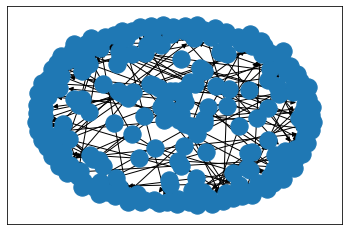

In [12]:
pos=nx.spring_layout(G)
nx.draw_networkx(G,pos,with_labels=False)

In [13]:
nx.write_gexf(G, "01_edu_hist.gexf")